# IPO Performance Prediction Model

For a long period of time, the price of new stock in China exhcange markets rose without exception on the IPO day and the investors expected a high intial return. The good IPO performance is due to the heavy-handed regulations that result in suppresed IPO prices. More details about the China's exchange market development can be found at: https://site.warrington.ufl.edu/ritter/files/IPO-Chinese-style.pdf    

However, sicne the reforming of latest IPO regulations to a registration based system, the price of some new stocks started to decline on the IPO day. Specifically, the price of 688737 declined 6.09% in its IPO day (22nd Oct. 2021) and it intiates a new age for investors applying for the new stock.   

As of 22nd March 2022, there are 161 new stocks listed in the China's exchange markets and 30 of their prices declined on the IPO day accounting for 20% of the total new stocks. As an investor of China's exchange markets, I tried to develop models to predict the IPO performance of new listing stocks with the basic information from: https://data.eastmoney.com/xg/xg/default.html

The models are developed based on tree-based methods, random forests, kNN, and SVM.

## The model is built iwth the following steps:

1. Clean the data
2. Build the models  
    2.1. Decision tree  
    2.2. Random forest  
    2.3. k nearest neighbors 
    2.4. Supporting vector machine 
3. IPO Performance Prediction

### 1. Clean the data

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [238]:
# The new stock information is obtained from https://data.eastmoney.com/xg/xg/default.html  
# The training data dates range from 2021.10.22 to 2022.03.23
newStock = pd.read_excel('NewStock.xlsx')
newStock.head()

,StockCode,StockName,ApplicationCode,TotalVolume,OnlineVolume,MaxPurchasePrice,MaxPurchase,OfferingPrice,CurrentPrice,FirstPrice,...,AnnouncementDate,PayDate,ListingDate,PE,IndustryPE,PrizeRate,Quotation,Buyers,PriceChange,Profit
0,688207,N格灵-U,787207,4625,1326,8.5,0.85,39.49,37.46,37.46,...,03-09>>,2022-03-09 00:00:00,2022-03-17,-,56.59,0.036148,3092.23,8836,-6.61,-1305
1,301219,N腾远,301219,3149,1265,7.5,0.75,173.98,185.82,185.82,...,03-10>>,2022-03-10 00:00:00,2022-03-17,63.05,54.07,0.01831,1953.05,9432,13.42,11678
2,688102,斯瑞新材,787102,4001,1026,6.5,0.65,10.48,16.62,19.92,...,03-09>>,2022-03-09 00:00:00,2022-03-16,101.03,53.93,0.033952,5332.76,10366,71.00,3730
3,688175,高凌信息,787175,2323,743,5.5,0.55,51.68,45.62,46.00,...,03-08>>,2022-03-08 00:00:00,2022-03-15,50.55,44.28,0.029552,4333.59,10231,-9.00,-2315
4,603261,立航科技,732261,1925,1925,19,1.90,19.70,34.33,28.37,...,03-07>>,2022-03-07 00:00:00,2022-03-15,22.59,40.37,0.014077,-,-,74.26,14630


In [239]:
newStock.columns

Index(['StockCode', 'StockName', 'ApplicationCode', 'TotalVolume',
       'OnlineVolume', 'MaxPurchasePrice', 'MaxPurchase', 'OfferingPrice',
       'CurrentPrice', 'FirstPrice', 'RegisterDate', 'AnnouncementDate',
       'PayDate', 'ListingDate', 'PE', 'IndustryPE', 'PrizeRate', 'Quotation',
       'Buyers', 'PriceChange', 'Profit'],
      dtype='object')

In [240]:
# Select the interested features
features = newStock[[ 'StockName', 'ListingDate', 'StockCode', 'TotalVolume',
                            'OnlineVolume', 'MaxPurchasePrice', 'MaxPurchase',
                            'OfferingPrice', 'PE', 'IndustryPE', 'PrizeRate', 
                            'Quotation', 'Buyers', 'PriceChange', 'Profit']]
features.head()

,StockName,ListingDate,StockCode,TotalVolume,OnlineVolume,MaxPurchasePrice,MaxPurchase,OfferingPrice,PE,IndustryPE,PrizeRate,Quotation,Buyers,PriceChange,Profit
0,N格灵-U,2022-03-17,688207,4625,1326,8.5,0.85,39.49,-,56.59,0.036148,3092.23,8836,-6.61,-1305
1,N腾远,2022-03-17,301219,3149,1265,7.5,0.75,173.98,63.05,54.07,0.01831,1953.05,9432,13.42,11678
2,斯瑞新材,2022-03-16,688102,4001,1026,6.5,0.65,10.48,101.03,53.93,0.033952,5332.76,10366,71.00,3730
3,高凌信息,2022-03-15,688175,2323,743,5.5,0.55,51.68,50.55,44.28,0.029552,4333.59,10231,-9.00,-2315
4,立航科技,2022-03-15,603261,1925,1925,19,1.90,19.70,22.59,40.37,0.014077,-,-,74.26,14630


In [241]:
# Check the basic information of features
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StockName         183 non-null    object        
 1   ListingDate       183 non-null    datetime64[ns]
 2   StockCode         183 non-null    int64         
 3   TotalVolume       183 non-null    int64         
 4   OnlineVolume      183 non-null    int64         
 5   MaxPurchasePrice  183 non-null    object        
 6   MaxPurchase       183 non-null    float64       
 7   OfferingPrice     183 non-null    float64       
 8   PE                183 non-null    object        
 9   IndustryPE        183 non-null    float64       
 10  PrizeRate         183 non-null    object        
 11  Quotation         183 non-null    object        
 12  Buyers            183 non-null    object        
 13  PriceChange       183 non-null    float64       
 14  Profit            183 non-

In [242]:
# Although there is no null value, I found '-' in PE column
# Change '-' to 0 as '-' means negative PE
features.loc[features['PE']=='-', 'PE'] = 0

C:\Users\Fan\anaconda3-2\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [243]:
# Remove stock codes beginning with 8 which are Bejing exchange market
features = features[features['StockCode'].astype(str).str.startswith('8')==False]

In [244]:
# Change '-' to nan as '-' means missing values in Quotation and Buyers column
# Fill the na values with mean values
features.loc[features['Quotation']=='-', 'Quotation'] = np.NaN
features.loc[features['Buyers']=='-', 'Buyers'] = np.NaN

features['Quotation'] = features['Quotation'].fillna(features['Quotation'].mean())
features['Buyers'] = features['Buyers'].fillna(features['Buyers'].mean())

In [245]:
# Identify the exchange market via stock codes
# Set the defalut market to the Main market
# Stock code starts with 68 is from the Kechuang market
# Stock code starts with 30 is from the Chuangye market
features['Market'] = 'Main'
features.loc[features['StockCode'].\
                     astype(str).str.startswith('68'), 'Market'] = 'Kechuang'
features.loc[features['StockCode'].\
                     astype(str).str.startswith('30'), 'Market'] = 'Chuangye'

In [246]:
# Identify the stock performance on the IPO day
features['Result'] = features['Profit'] < 0

In [247]:
# Check the basic information of modified features
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 182
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StockName         161 non-null    object        
 1   ListingDate       161 non-null    datetime64[ns]
 2   StockCode         161 non-null    int64         
 3   TotalVolume       161 non-null    int64         
 4   OnlineVolume      161 non-null    int64         
 5   MaxPurchasePrice  161 non-null    object        
 6   MaxPurchase       161 non-null    float64       
 7   OfferingPrice     161 non-null    float64       
 8   PE                161 non-null    object        
 9   IndustryPE        161 non-null    float64       
 10  PrizeRate         161 non-null    object        
 11  Quotation         161 non-null    float64       
 12  Buyers            161 non-null    float64       
 13  PriceChange       161 non-null    float64       
 14  Profit            161 non-

In [248]:
# Change the object format to float or int
features['MaxPurchasePrice'] = features['MaxPurchasePrice'].astype(float)
features['PE'] = features['PE'].astype(float)
features['PrizeRate'] = features['PrizeRate'].astype(float)
features['Profit'] = features['Profit'].astype(int)

features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 182
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StockName         161 non-null    object        
 1   ListingDate       161 non-null    datetime64[ns]
 2   StockCode         161 non-null    int64         
 3   TotalVolume       161 non-null    int64         
 4   OnlineVolume      161 non-null    int64         
 5   MaxPurchasePrice  161 non-null    float64       
 6   MaxPurchase       161 non-null    float64       
 7   OfferingPrice     161 non-null    float64       
 8   PE                161 non-null    float64       
 9   IndustryPE        161 non-null    float64       
 10  PrizeRate         161 non-null    float64       
 11  Quotation         161 non-null    float64       
 12  Buyers            161 non-null    float64       
 13  PriceChange       161 non-null    float64       
 14  Profit            161 non-

### 2. Build the models
#### 2.1. Decision tree

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [250]:
# Create dummy variables of Market column
modelFeatures = pd.get_dummies(features, columns=['Market'], drop_first=True)
modelFeatures.head()

,StockName,ListingDate,StockCode,TotalVolume,OnlineVolume,MaxPurchasePrice,MaxPurchase,OfferingPrice,PE,IndustryPE,PrizeRate,Quotation,Buyers,PriceChange,Profit,Result,Market_Kechuang,Market_Main
0,N格灵-U,2022-03-17,688207,4625,1326,8.5,0.85,39.49,0.00,56.59,0.036148,3092.230000,8836.000000,-6.61,-1305,True,1,0
1,N腾远,2022-03-17,301219,3149,1265,7.5,0.75,173.98,63.05,54.07,0.018310,1953.050000,9432.000000,13.42,11678,False,0,0
2,斯瑞新材,2022-03-16,688102,4001,1026,6.5,0.65,10.48,101.03,53.93,0.033952,5332.760000,10366.000000,71.00,3730,False,1,0
3,高凌信息,2022-03-15,688175,2323,743,5.5,0.55,51.68,50.55,44.28,0.029552,4333.590000,10231.000000,-9.00,-2315,True,1,0
4,立航科技,2022-03-15,603261,1925,1925,19.0,1.90,19.70,22.59,40.37,0.014077,3645.553862,10720.572414,74.26,14630,False,0,1


In [251]:
X = modelFeatures.drop(columns=['StockName', 'ListingDate', 'PriceChange', \
                                'StockCode', 'Profit', 'Result']).values
y = modelFeatures['Result'].values

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y, random_state=42)

In [253]:
# The objective of the model is try to maximize the sensitivity to avoid loss
dtc_param_grid = {'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]}

dtc_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=dtc_param_grid, scoring='recall', cv=StratifiedKFold(n_splits=3))
dtc_grid.fit(X_train, y_train)
print('Grid Search with recall:')
print('Best parameters: ', dtc_grid.best_params_)
print('Best cross-validation score(recall): {:.3f}'.format(dtc_grid.best_score_))
dtc_confusion = confusion_matrix(dtc_grid.predict(X_test), y_test)
print('The confusion matrix is: \n {}'.format(dtc_confusion))

Grid Search with recall:
Best parameters:  {'criterion': 'gini', 'max_depth': 22, 'min_samples_leaf': 1}
Best cross-validation score(recall): 0.667
The confusion matrix is: 
 [[56  8]
 [10  7]]


In [254]:
dtc = dtc_grid.best_estimator_

<AxesSubplot:>

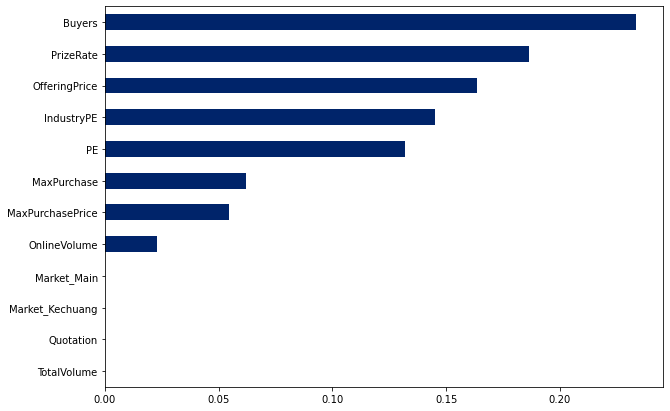

In [255]:
# The number of buyers is found to be the most important features that reduces the most impurity
feature_importances = dtc.feature_importances_
plt.figure(figsize=(10, 7))
variable_importances = pd.Series(feature_importances, modelFeatures.drop(columns=['StockName', 'ListingDate', 'PriceChange', \
                                'StockCode', 'Profit', 'Result']).columns)
variable_importances.sort_values().plot.barh(color='#00246A')

[Text(396.4736842105263, 1009.5428571428572, 'OfferingPrice <= 34.495\ngini = 0.305\nsamples = 80\nvalue = [65, 15]\nclass = Win'),
 Text(176.21052631578948, 854.2285714285715, 'Buyers <= 9439.0\ngini = 0.05\nsamples = 39\nvalue = [38, 1]\nclass = Win'),
 Text(117.47368421052632, 698.9142857142858, 'PrizeRate <= 0.027\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Win'),
 Text(58.73684210526316, 543.6, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Win'),
 Text(176.21052631578948, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Loss'),
 Text(234.94736842105263, 698.9142857142858, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]\nclass = Win'),
 Text(616.7368421052631, 854.2285714285715, 'Buyers <= 10072.5\ngini = 0.45\nsamples = 41\nvalue = [27, 14]\nclass = Win'),
 Text(352.42105263157896, 698.9142857142858, 'PE <= 3.72\ngini = 0.255\nsamples = 20\nvalue = [17, 3]\nclass = Win'),
 Text(293.6842105263158, 543.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Loss'),
 Text

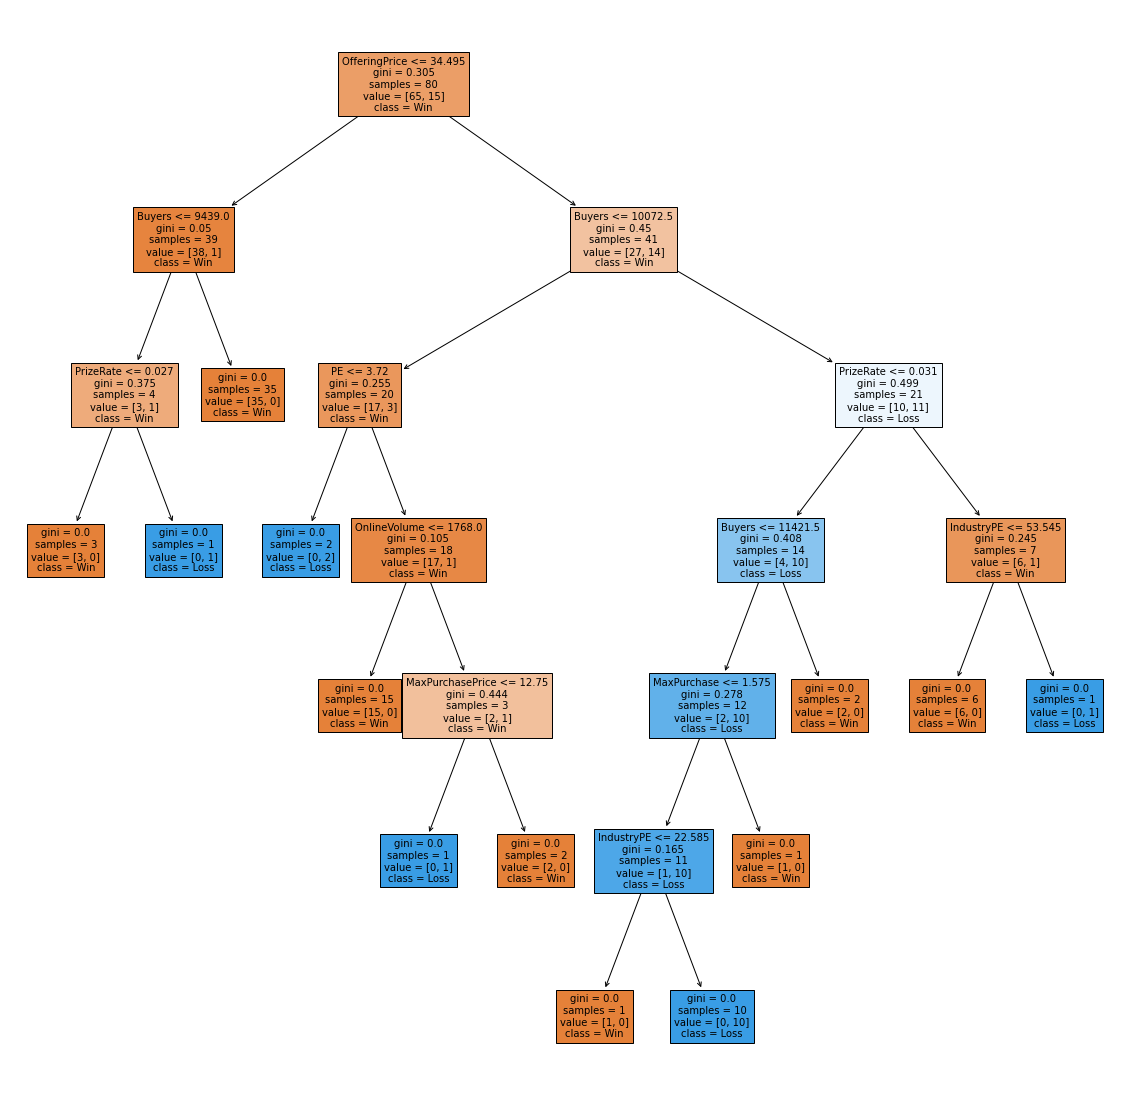

In [256]:
feature_names = modelFeatures.drop(columns=['StockName', 'ListingDate', 'PriceChange', \
                                'StockCode', 'Profit', 'Result']).columns
class_names = ['Win', 'Loss']
plt.figure(figsize=(20, 20))
plot_tree(dtc, feature_names=feature_names,
         class_names=class_names, filled=True, fontsize=10)

#### 2.2. Random forest

In [257]:
from sklearn.ensemble import RandomForestClassifier
import time

In [258]:
# Record the processing time for reference
start = time.time()

rfc_param_grid = {'min_samples_leaf': [1, 3, 5, 7, 9],
             'criterion': ['gini', 'entropy'],
             'max_depth': [1, 10, 20, 50],
             'max_features': [2, 'sqrt', 'log2'],
             'n_estimators': [5, 10, 30, 50, 80, 100],
             'bootstrap': [True, False]}

rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid=rfc_param_grid, scoring='recall',\
                    cv=StratifiedKFold(n_splits=3))
rfc_grid.fit(X_train, y_train)

print('Grid Search with recall:')
print('Best parameters: ',rfc_grid.best_params_)
print('Best cross-validation score(recall): {:.3f}'.format(rfc_grid.best_score_))
rfc_confusion = confusion_matrix(rfc_grid.predict(X_test), y_test)
print('The confusion matrix is: \n {}'.format(rfc_confusion))

end = time.time()
print('The random forest processing time is {}.'.format(end - start))

Grid Search with recall:
Best parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 5}
Best cross-validation score(recall): 0.600
The confusion matrix is: 
 [[57  9]
 [ 9  6]]
The random forest processing time is 287.3021881580353.


In [259]:
rfc = rfc_grid.best_estimator_

<AxesSubplot:>

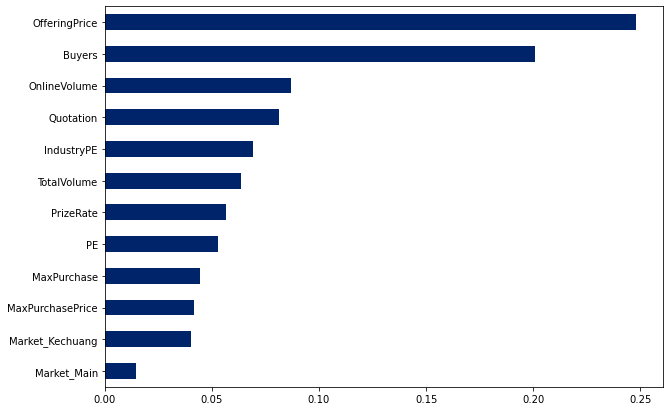

In [260]:
# The number of buyers is found to be the most important features that reduces the most impurity
rfc_feature_importances = rfc.feature_importances_
plt.figure(figsize=(10, 7))
rfc_variable_importances = pd.Series(rfc_feature_importances, modelFeatures.drop(columns=['StockName', 'ListingDate', 'PriceChange', \
                                'StockCode', 'Profit', 'Result']).columns)
rfc_variable_importances.sort_values().plot.barh(color='#00246A')

#### 2.3. k nearest neighbors

In [261]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [262]:
knn_param_grid = {'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_param_grid, scoring='recall', cv=StratifiedKFold(n_splits=3))
knn_grid.fit(X_train, y_train)
print('Grid Search with recall:')
print('Best parameters: ', knn_grid.best_params_)
print('Best cross-validation score(recall): {:.3f}'.format(knn_grid.best_score_))
knn_confusion = confusion_matrix(knn_grid.predict(X_test), y_test)
print('The confusion matrix is: \n {}'.format(knn_confusion))

Grid Search with recall:
Best parameters:  {'kneighborsclassifier__n_neighbors': 1}
Best cross-validation score(recall): 0.667
The confusion matrix is: 
 [[59  5]
 [ 7 10]]


In [263]:
knn = knn_grid.best_estimator_

#### 2.4. Supporting vector machine

In [264]:
from sklearn.svm import SVC

In [265]:
svm_param_grid = [{'svc__kernel': ['rbf'], 
               'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             {'svc__kernel': ['poly'],
             'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'svc__degree': [1, 2, 3, 4, 5]}]

svm_pipe = make_pipeline(StandardScaler(), SVC())
svm_grid = GridSearchCV(svm_pipe, param_grid=svm_param_grid, scoring='recall', cv=StratifiedKFold(n_splits=3))
svm_grid.fit(X_train, y_train)
print('Grid Search with recall:')
print('Best parameters: ', svm_grid.best_params_)
print('Best cross-validation score(recall): {:.3f}'.format(svm_grid.best_score_))
svm_confusion = confusion_matrix(svm_grid.predict(X_test), y_test)
print('The confusion matrix is: \n {}'.format(svm_confusion))

Grid Search with recall:
Best parameters:  {'svc__C': 0.001, 'svc__degree': 4, 'svc__gamma': 10, 'svc__kernel': 'poly'}
Best cross-validation score(recall): 0.800
The confusion matrix is: 
 [[52  8]
 [14  7]]


In [266]:
svm = svm_grid.best_estimator_

### 3. IPO Performance Prediction

In [267]:
# The training data dates range from 2022.03.24 to 2022.04.11
newStock_pred = pd.read_excel('NewTest.xlsx')
newStock_pred['Result'] = newStock_pred['Profit'] < 0
newStock_pred.head()

,StockName,TotalVolume,OnlineVolume,MaxPurchasePrice,MaxPurchase,OfferingPrice,PE,IndustryPE,PrizeRate,Quotation,Buyers,Market_Chuangye,Market_Kechuang,Market_Main,Profit,Result
0,兴通股份,5000,4500,20.0,2.0,21.52,22.99,18.74,0.035983,1356.63,14324,0,0,1,13330,False
1,鹿山新材,2300,2070,9.0,0.9,25.79,22.99,25.13,0.026696,2099.69,14266,0,0,1,33970,False
2,祥明智能,1700,1700,17.0,1.7,29.66,35.00,43.88,0.012771,3645.55,10721,1,0,0,11015,False
3,兆讯传媒,5000,2112,12.0,1.2,39.88,39.33,27.51,0.020171,3572.68,9922,1,0,0,-2540,True
4,泰恩康,5910,2580,15.0,1.5,19.93,30.84,18.25,0.021435,3477.19,8458,1,0,0,6530,False


In [268]:
X_test = newStock_pred.drop(columns=['StockName', 'Market_Chuangye', 'Profit', 'Result']).values
y_test = newStock_pred['Result'].values
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

In [269]:
dtc.fit(X, y)
rfc.fit(X, y)
knn.fit(X_scaled, y)
svm.fit(X_scaled, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, degree=4, gamma=10, kernel='poly'))])

In [270]:
prediction = pd.DataFrame()
prediction['DTC_pred'] = dtc.predict(X_test)
prediction['RFC_pred'] = rfc.predict(X_test)
prediction['kNN_pred'] = knn.predict(X_test_scaled)
prediction['SVM_pred'] = svm.predict(X_test_scaled)

In [271]:
pred_merge = pd.concat([newStock_pred, prediction], axis=1)
pred_merge['Prediction'] = pred_merge['DTC_pred'] + pred_merge['RFC_pred'] + pred_merge['kNN_pred'] + pred_merge['SVM_pred']

## Summary
The test dataset contains 14 new stocks and 7 of the stock price declined on the IPO day.  
The predicition model successfully predicted 5 of them. In addition, there is one false positive prediction

In [273]:
pred_merge[['StockName', 'DTC_pred', 'RFC_pred', 'kNN_pred', 'SVM_pred', 'Prediction', 'Result']]

,StockName,DTC_pred,RFC_pred,kNN_pred,SVM_pred,Prediction,Result
0,兴通股份,False,False,False,False,False,False
1,鹿山新材,False,False,False,False,False,False
2,祥明智能,False,False,False,False,False,False
3,兆讯传媒,True,False,False,True,True,True
4,泰恩康,False,False,False,False,False,False
5,富士莱,False,False,False,False,False,False
6,万凯新材,False,False,False,False,False,True
7,仁度生物,False,False,False,False,False,True
8,荣昌生物,True,True,False,False,True,True
9,长光华芯,True,True,True,False,True,True
